## Week 4: Probability Mass Functions & Cumulative Distribution Functions

##### Bryan Rogers
##### Bellevue University
##### DSC530: Data Exploration and Analysis
##### 9/19/23

### Exercise 3-1

Exercise: Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable numkdhh to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [4]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

Downloaded first.py


In [5]:
import numpy as np

In [18]:
import nsfg
import thinkstats2
import thinkplot

In [7]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

In [8]:
# read the file
resp = nsfg.ReadFemResp()

In [9]:
# create a variable 'pmf' that works with the respondent variable NUMKDHH
pmf = thinkstats2.Pmf(resp.numkdhh, label = 'Reported')

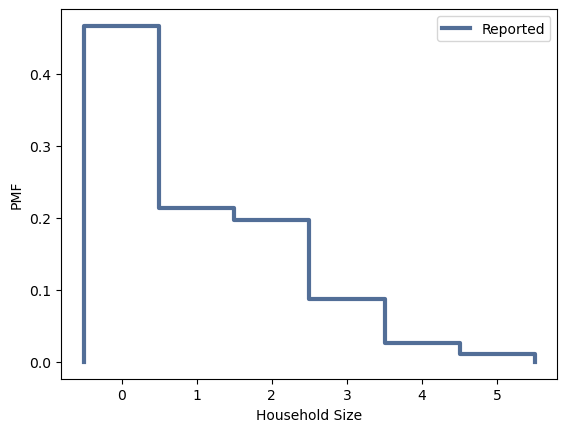

<Figure size 800x600 with 0 Axes>

In [10]:
# plot the pmf variable of household sizes
thinkplot.Pmf(pmf)
thinkplot.Show(xlabel = 'Household Size', ylabel = 'PMF')

In [11]:
# create a function that show biased PMF
def BiasPmf(pmf, label):
    biased_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        biased_pmf.Mult(x, x)
        
    bias_pmf.Normalize()
    return biased_pmf

In [12]:
#Create a PMF variable that shows bias of household size data
bias_pmf = BiasPmf(pmf, label ='biased pmf')

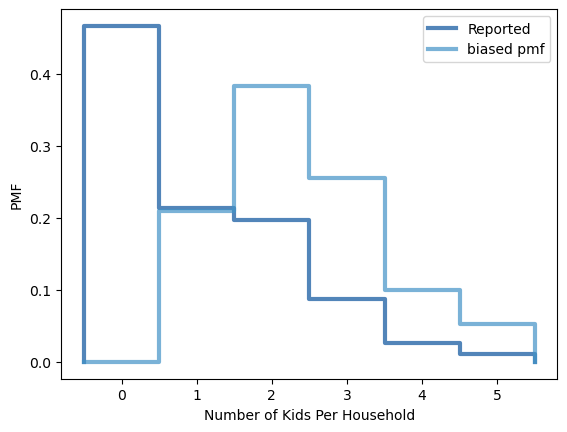

<Figure size 800x600 with 0 Axes>

In [13]:
#Compare the PMF of both the biased pmf and the normal pmf
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, bias_pmf])
thinkplot.Show(xlabel = 'Number of Kids Per Household', ylabel = "PMF")

In [14]:
#print the  means for both of the PMFs
print("NUMKDHH Actual Mean = " , pmf.Mean(),"\nNUMKDHH Biased Mean = " , bias_pmf.Mean())

NUMKDHH Actual Mean =  1.024205155043831 
NUMKDHH Biased Mean =  2.403679100664282


### Exercise 3-2

Exercise: In Chapter 3 we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different: %
 
% where the 
 are the unique values in the PMF and 
. Similarly, you can compute variance like this: %
 
% Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [25]:
# write a function that computes the mean of a pmf object
def PmfMean(pmf):
    return sum(p * x for x, p in pmf.Items())

PmfMean(pmf)

1.024205155043831

In [27]:
pmf.Mean()

1.024205155043831

In [ ]:
# write a function that computes the variance of a pmf object
def PmfVar(pmf, mu=None):
    if mu is None:
        mu = PmfMean(pmf)
    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

PmfVar(pmf)

In [ ]:
pmf.Var()

### Exercise 4-1

Exercise: How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [21]:
#Read Preg File
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
others = live[live.birthord != 1]

In [22]:
#Create CDF of birth weights using "others" only since I am a middle child
cdf_others = thinkstats2.Cdf(others.totalwgt_lb, label = "totalwgt_lb")
print(cdf_others)

totalwgt_lb


In [24]:
#Find percentile rank of my birth weight
cdf_others.PercentileRank(8.45)

80.74866310160428

### Exercise 4-2

Exercise: The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

Now plot the CDF. Is the distribution uniform?

In [16]:
# use random.random to generate a sample of 1000 random numbers
random_sample = np.random.random(1000)

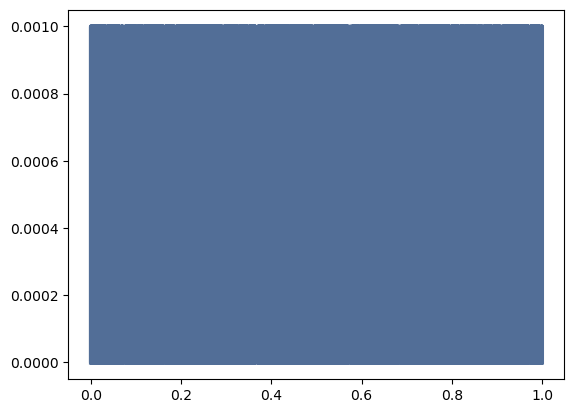

In [18]:
# Create PMF and plot from sample of random numbers
pmf_random = thinkstats2.Pmf(random_sample)
thinkplot.Pmf(pmf_random, label = " Random Numbers")

{'xscale': 'linear', 'yscale': 'linear'}

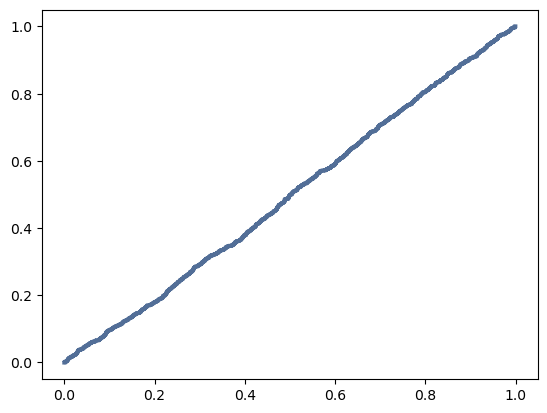

In [20]:
#Create CDF and plot from sample
cdf_random = thinkstats2.Cdf(random_sample)
thinkplot.Cdf(cdf_random, label = "CDF Random Sample")

With a straight linear line and a uniform distribution of the CDF and PMF plots, this looks to be a very unifrom distribution of random numbers. There does not appear to be any outliers and no imperfections. 